In [1]:
# pip install psycopg2 if error=> ImportError: No module named psycopg2
import databaseconfig as config
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
%matplotlib inline

# creating connection url and connectiong to Postgres DB
connURL = f"postgresql://{config.mysql['user']}:{config.mysql['password']}{config.mysql['url']}"
engine = create_engine(connURL)

# create connection
connection = engine.connect()
connection

### Create a histogram to visualize the most common salary ranges for employees.

In [2]:
# read data from the tables to pd dataframes
empSalDF = pd.read_sql('SELECT EMP."EMP_NO", EMP."LAST_NAME", EMP."FIRST_NAME", SAL."SALARY" FROM "EMPLOYEES" as EMP LEFT JOIN "SALARIES" as SAL on (EMP."EMP_NO" = SAL."EMP_NO")', connection)
empSalDF.head()

,EMP_NO,LAST_NAME,FIRST_NAME,SALARY
0,10005,Maliniak,Kyoichi,78228
1,10010,Piveteau,Duangkaew,72488
2,10011,Sluis,Mary,42365
3,10013,Terkki,Eberhardt,40000
4,10017,Bouloucos,Cristinel,71380


In [3]:
# dataframe dimensions
empSalDF.shape

(300024, 4)

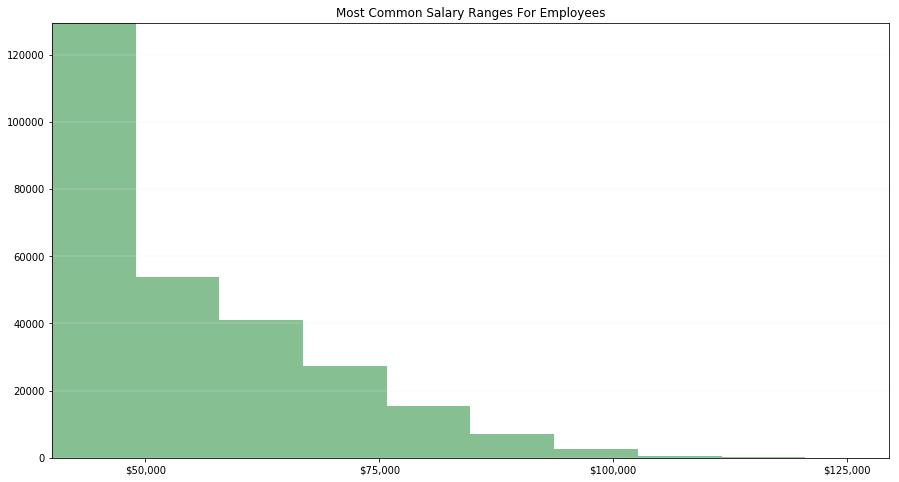

In [9]:
ax =  empSalDF.hist(column='SALARY', figsize=(15, 8), color='#86bf91', grid=False, bins=10)
ax = ax[0]
for x in ax:
    x.set_title("Most Common Salary Ranges For Employees")
    x.xaxis.set_major_formatter(mp.ticker.StrMethodFormatter('${x:,g}'))
    x.xaxis.set_major_locator(plt.MaxNLocator(4))
    x.set_xlim(empSalDF["SALARY"].min(), empSalDF["SALARY"].max())
    x.set_ylim(0, empSalDF["SALARY"].max())
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='solid', alpha=0.2, color='#eeeeee', zorder=1)

### Create a bar chart of average salary by title.

In [14]:
avgSalaryDF = pd.read_sql('SELECT TL."TITLES", ROUND(AVG(SAL."SALARY"), 2) AS "SALARY" FROM "EMPLOYEES" as EMP LEFT JOIN "SALARIES" as SAL on (EMP."EMP_NO" = SAL."EMP_NO") JOIN "TITLES" as TL on (EMP."EMP_NO" = TL."EMP_NO") GROUP BY TL."TITLES"', connection)
avgSalaryDF.head(10)

,TITLES,SALARY
0,Assistant Engineer,48493.20
1,Engineer,48539.78
2,Manager,51531.04
3,Senior Engineer,48506.75
4,Senior Staff,58503.29
5,Staff,58465.27
6,Technique Leader,48580.51


[Text(0, 0, 'Assistant Engineer'),
 Text(0, 0, 'Engineer'),
 Text(0, 0, 'Manager'),
 Text(0, 0, 'Senior Engineer'),
 Text(0, 0, 'Senior Staff'),
 Text(0, 0, 'Staff'),
 Text(0, 0, 'Technique Leader')]

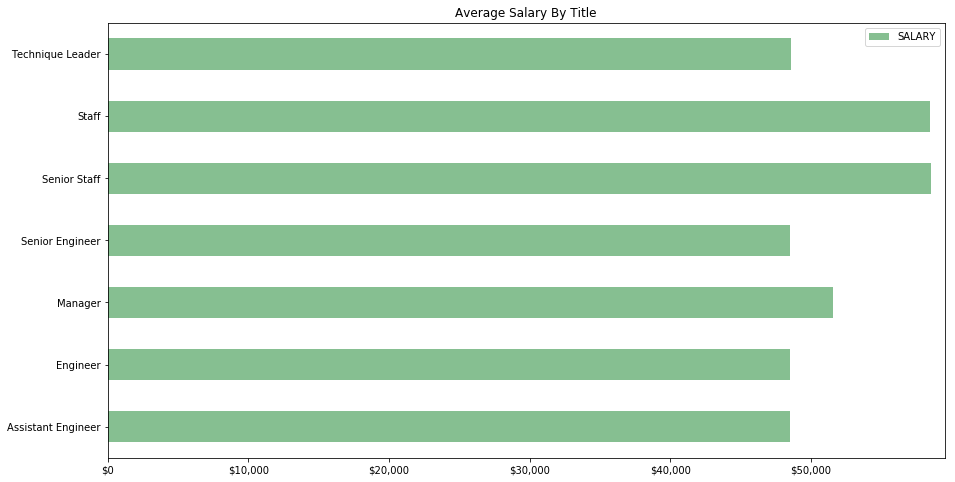

In [43]:
ax = avgSalaryDF.plot.barh(figsize=(15, 8), color='#86bf91', grid=False)
ax.set_title("Average Salary By Title")
ax.xaxis.set_major_formatter(mp.ticker.StrMethodFormatter('${x:,g}'))
ax.set_xlim(0, avgSalaryDF["SALARY"].max() + 1000)
ax.set_yticklabels(avgSalaryDF['TITLES'])